In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [3]:
dataset_url="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,".")

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [4]:
with tarfile.open("./cifar10.tgz","r:gz") as tar:
    tar.extractall(path="./data")

In [5]:

data_dir="./data/cifar10/"
classes=os.listdir(data_dir+"train/")
print(classes)

['ship', 'truck', 'dog', 'horse', 'automobile', 'deer', 'frog', 'bird', 'cat', 'airplane']


In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
dataset=ImageFolder(data_dir+"train/",transform=ToTensor())
dataset[0]


(tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
          [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
          [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
          ...,
          [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
          [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
          [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
 
         [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
          [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
          [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
          ...,
          [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
          [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
          [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
 
         [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
          [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
          [0.8118, 0.8157, 0.8235,  ...,

In [7]:
img,label=dataset[0]
print(img.shape)

torch.Size([3, 32, 32])


Label : airplane (0)


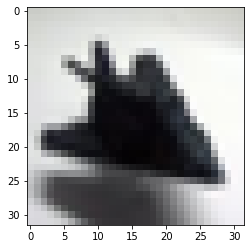

In [8]:
import matplotlib.pyplot as plt
def show_example(img,label):
    print("Label :", dataset.classes[label],"(" +str(label)+")")
    plt.imshow(img.permute(1,2,0))
show_example(img,label)    

In [9]:
# training and validation dataset
def split_indices(n,val_pct=0.1,seed=99):
    n_val=int(val_pct*n)
    np.random.seed(seed)
    idxs=np.random.permutation(n)
    return idxs[n_val:],idxs[:n_val]

In [10]:
n=len(dataset)
val_pct=0.2
rand_seed=42
train_indices,val_indices=split_indices(n,val_pct,rand_seed)
print(len(train_indices),len(val_indices))


40000 10000


In [11]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader



In [12]:
batch_size=100
train_sampler=SubsetRandomSampler(train_indices)
train_dl=DataLoader(dataset,batch_size,sampler=train_sampler)

In [13]:
val_sampler=SubsetRandomSampler(val_indices)
val_dl=DataLoader(dataset,batch_size,sampler=val_sampler)

In [14]:
from torchvision.utils import  make_grid
def show_batch(dl):
    for images,labels in dl:
        fig,ax=plt.subplots(figsize=(10,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break
        

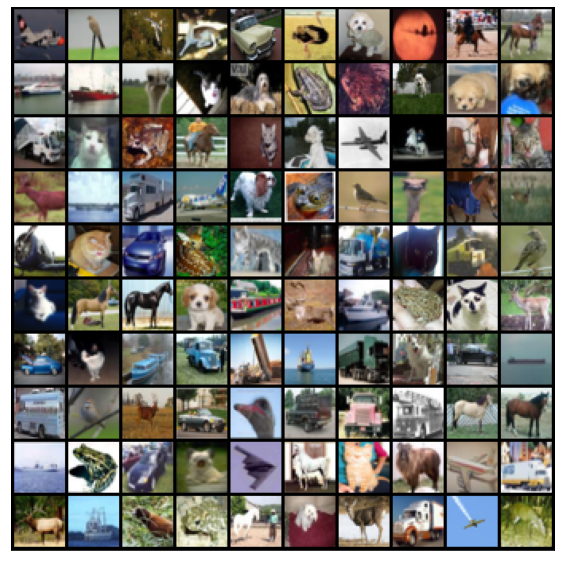

In [15]:
show_batch(train_dl)

In [16]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
# ?nn.Sequential

In [18]:
# ?nn.relu

In [19]:
model=nn.Sequential(

            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
           
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
           
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
           
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
           
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
           
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
        nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
           
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Flatten(), 
            nn.Linear(16, 12),
            nn.ReLU(),
            nn.Linear(12, 10))
#             nn.ReLU(),
#             nn.Linear(512, 10))


In [20]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")
def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)
class DeviceDataLoader():
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    def __iter__(self):
        for b in self.dl:
            yield to_device(b,self.device)
    def __len__(self):
        return len(self.dl)
device=get_default_device()
train_dl=DeviceDataLoader(train_dl,device)
val_dl=DeviceDataLoader(val_dl,device)


In [21]:
def loss_batch(model,loss_fn,xb,yb,opt=None,metric=None):
    preds=model(xb)
    loss=loss_fn(preds,yb)
    if opt:
        loss.backward()
        opt.step()
        opt.zero_grad()
    metric_result=None
    if metric:
        metric_result=metric(preds,yb)
    return loss.item(),len(xb),metric_result

In [22]:
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        result=[loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
        losses,nums,metrics=zip(*result)
        total=np.sum(nums)
        avg_loss=np.sum(np.multiply(losses,nums))/total
        avg_metric=np.sum(np.multiply(metrics,nums))/total
        return avg_loss,total,avg_metric

In [23]:
def accuracy(output,labels):
    _,preds=torch.max(output,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [24]:
def fit(epochs,model,loss_fn,train_dl,valid_dl,opt_fn=None,lr=0.01,metric=None):
    train_losses,val_losses,val_metrics=[],[],[]
    if opt_fn is None:
        opt_fn=torch.optim.SGD
    opt=opt_fn(model.parameters(),lr=lr)
    for epoch in range(epochs):
        model.train()
#         print("ok1")
        for xb,yb in train_dl:
            loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
#         print("ok")    
        model.eval()
        result=evaluate(model,loss_fn,valid_dl,metric)  
        val_loss,total,val_metric=result
        train_losses.append(loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        if metric:
            print("Epoch [{}/{}] , Loss : {:.4f}, {} : {:.4f}".format(epoch+1,epochs,val_loss,metric.__name__,val_metric))
        else:
            print("Epoch [{}/{}] , Train_Loss : {:.4f} ,val_Loss : {:.4f}".format(epoch+1,epochs,loss,val_loss))
    return train_losses,val_losses,val_metrics     

In [25]:
num_epochs=10
opt_fn=torch.optim.Adam
lr=0.007
model.to(device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16, out_features=12, bias=True)
  (17): ReLU()
  (18): Linear(in_featur

In [26]:
history=fit(num_epochs,model,F.cross_entropy,train_dl,val_dl,opt_fn=opt_fn,lr=lr,metric=accuracy)
train_losses,val_losses,val_matrics=history

Epoch [1/10] , Loss : 1.9615, accuracy : 0.2619
Epoch [2/10] , Loss : 1.8593, accuracy : 0.3069
Epoch [3/10] , Loss : 1.7731, accuracy : 0.3455
Epoch [4/10] , Loss : 1.6918, accuracy : 0.3723
Epoch [5/10] , Loss : 1.6971, accuracy : 0.3850
Epoch [6/10] , Loss : 1.6687, accuracy : 0.3804
Epoch [7/10] , Loss : 1.5814, accuracy : 0.4125
Epoch [8/10] , Loss : 1.5925, accuracy : 0.4093
Epoch [9/10] , Loss : 1.5729, accuracy : 0.4160
Epoch [10/10] , Loss : 1.5459, accuracy : 0.4300


In [27]:
# def plot_metric(metric_value):
#     plt.plot(metric_value,"-x")
#     plt.xlabel("epoch")
#     plt.ylabel("accuracy")
#     plt.title("accuracy vs No. of epochs")
# plot_metric([val_losses]+val_matrics)    

In [28]:
def plot_losses(train_losses,val_losses):
    plt.plot(train_losses,"-x")
    plt.plot(val_losses,"-o")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(["Training","validation"])
    plt.title("Loss vs Number of epochs")

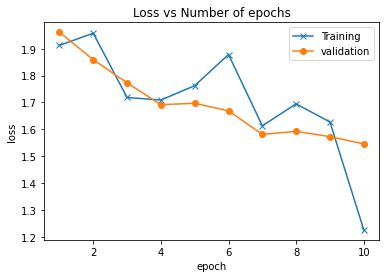

In [30]:
plot_losses([None]+train_losses,[None]+val_losses)

In [31]:
test_dataset=ImageFolder(data_dir+"test/",transform=ToTensor())

In [33]:
test_loader=DeviceDataLoader(DataLoader(test_dataset,batch_size),device)
test_loss,_,test_acc=evaluate(model,F.cross_entropy,test_loader,metric=accuracy)
print("Loss: {:.4f} , Accuracy : {:.4f}".format(test_loss,test_acc))

Loss: 1.5353 , Accuracy : 0.4335


In [34]:
torch.save(model.state_dict(),"cifar10-cnn.pth")

In [35]:
# commit()

NameError: name 'commit' is not defined